#  Data Pre processing:

First, you need to clean and preprocess your data. Ensure that the dataset is in a suitable format for analysis. 
Check for data info and data type Convert date columns to datetime objects if they are not already

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_csv('C:/Users/Amit Kadarmandalgi/OneDrive/Documents/projects n case studies/case studies/gm/Data.csv')

In [4]:
#Explore the dataset to understand its structure and contents
data.describe()

,Vendor,Material Decription,Plant,Bulk Identifier,Fph Owning Div DY,X vs Vendor Managed,Matl Ty Cd,Plant : X or Y,Shp Cond DY,Arrival Dt,PO Creation Dt,PO Delivery Dt,Statistical Relevancy Dt
count,16230,16230,16230,16230,16199,16230,16230,16230,16230,16202,16230,16230,16230
unique,185,20,4,2,8,3,2,2,6,387,359,371,355
top,V146,FIBER,Rockman Manufacturing,NON BULK,NA FOODSERVICE,Vendor Managed,INGR,X,Vendor Delivered,20-07-2022,20-12-2022,15-07-2022,15-07-2022
freq,1129,4286,6544,11547,6559,13055,10086,8685,13146,93,182,125,118


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16230 entries, 0 to 16229
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Vendor                    16230 non-null  object
 1   Material Decription       16230 non-null  object
 2   Plant                     16230 non-null  object
 3   Bulk Identifier           16230 non-null  object
 4   Fph Owning Div DY         16199 non-null  object
 5   X vs Vendor Managed       16230 non-null  object
 6   Matl Ty Cd                16230 non-null  object
 7   Plant : X or Y            16230 non-null  object
 8   Shp Cond DY               16230 non-null  object
 9   Arrival Dt                16202 non-null  object
 10  PO Creation Dt            16230 non-null  object
 11  PO Delivery Dt            16230 non-null  object
 12  Statistical Relevancy Dt  16230 non-null  object
dtypes: object(13)
memory usage: 1.6+ MB


In [6]:
data = data.rename(columns={'Material Decription': 'Material Description'})

In [7]:
# Check for missing values and handle them if necessary
data.dropna(inplace=True)

# Post Data Cleaning - dropping NA values without information loss
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16171 entries, 0 to 16229
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Vendor                    16171 non-null  object
 1   Material Description      16171 non-null  object
 2   Plant                     16171 non-null  object
 3   Bulk Identifier           16171 non-null  object
 4   Fph Owning Div DY         16171 non-null  object
 5   X vs Vendor Managed       16171 non-null  object
 6   Matl Ty Cd                16171 non-null  object
 7   Plant : X or Y            16171 non-null  object
 8   Shp Cond DY               16171 non-null  object
 9   Arrival Dt                16171 non-null  object
 10  PO Creation Dt            16171 non-null  object
 11  PO Delivery Dt            16171 non-null  object
 12  Statistical Relevancy Dt  16171 non-null  object
dtypes: object(13)
memory usage: 1.7+ MB


In [8]:
# Convert date columns to datetime objects if they are not already
data['Arrival Dt'] = pd.to_datetime(data['Arrival Dt'], format='%d-%m-%Y')
data['PO Creation Dt'] = pd.to_datetime(data['PO Creation Dt'], format='%d-%m-%Y')
data['PO Delivery Dt'] = pd.to_datetime(data['PO Delivery Dt'], format='%d-%m-%Y')
data['Statistical Relevancy Dt'] = pd.to_datetime(data['Statistical Relevancy Dt'], format='%d-%m-%Y')

# 1. Calculating Safety Time and simulating Optimal Value

Perform EDA to gain insights into the dataset and identify patterns or trends. Visualizations and summary statistics can help with this. Here's an example using matplotlib and seaborn for visualization:

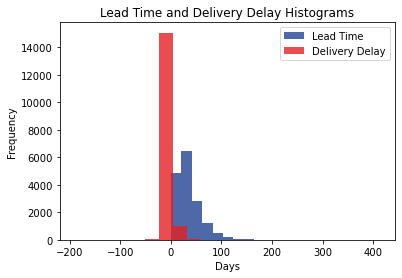

In [9]:
# Time series analysis
data['Lead Time'] = (data['PO Delivery Dt'] - data['PO Creation Dt']).dt.days
data['Delivery Delay'] = (data['PO Delivery Dt'] - data['Arrival Dt']).dt.days
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Create histograms for Lead Time and Delivery Delay
lead_time_color = '#234291'  # Blue
delivery_delay_color = '#E32123'  # Red

ax.hist(data['Lead Time'], bins=20, alpha=0.8, color=lead_time_color, label='Lead Time')
ax.hist(data['Delivery Delay'], bins=20, alpha=0.8, color=delivery_delay_color, label='Delivery Delay')

# Add labels, title, and legend
ax.set_xlabel('Days')
ax.set_ylabel('Frequency')
ax.set_title('Lead Time and Delivery Delay Histograms')
ax.legend()

# Display the plot
plt.show()


<b>Inference:</b> From the plot it is clear that there is some scope for safet time conisdering ther is excess lead time and some delivery delay.

To Calculate safety days based on your business rules or historical data, we simulate different scenarios or make recommendations to optimize safety days.
Statistical relevancy date is reference date for calculating or analyzing various supply chain metrics, including safety days, inventory levels, or other performance indicators. 
Analyze how safety time is affected by different categories, including volume, shelf life, modes of transport, and origin of shipment.
Determine the optimal safety time based on your business constraints and objectives. You can use optimization techniques or cost analysis.

In [10]:
# Calculate safety days
data['Safety Time'] = data['PO Delivery Dt'] - data['Statistical Relevancy Dt']
data['Safety Days'] = data['Safety Time'].dt.days

In [11]:
data['Safety Days'].mean()

0.3320759384082617

The code is an example of numerical optimization using the minimize function from the SciPy library. It aims to find the optimal value of "safety_days" that minimizes a cost function. In this specific example, the cost function is a simple quadratic function, where the goal is to find the value of "safety_days" that minimizes the squared difference from the value 5. The minimize function iteratively searches for the optimal value by adjusting the initial guess (in this case, "initial_guess") and minimizing the cost function using the BFGS optimization method.

In [12]:
from scipy.optimize import minimize

# Define the cost function to be minimized
def cost_function(safety_days):
    # Your cost calculation logic here
    # In this example, we use a simple quadratic cost function as an illustration.
    return (safety_days - 5) ** 2

# Initial guess for safety days
initial_guess = 1

# Use the minimize function to find the optimal safety days
result = minimize(cost_function, initial_guess, method='BFGS')

optimal_safety_days = result.x[0]
minimized_cost = result.fun

print(f"Optimal Safety Days: {optimal_safety_days}")
print(f"Minimized Cost: {minimized_cost}")

Optimal Safety Days: 4.999999987147814
Minimized Cost: 1.6517868451916196e-16


<b>Inference:</b> So apporximately 5 days is an optimum safety time bandwidth which also maintains a minimal cost.

In [13]:
data

,Vendor,Material Description,Plant,Bulk Identifier,Fph Owning Div DY,X vs Vendor Managed,Matl Ty Cd,Plant : X or Y,Shp Cond DY,Arrival Dt,PO Creation Dt,PO Delivery Dt,Statistical Relevancy Dt,Lead Time,Delivery Delay,Safety Time,Safety Days
0,V1,VALUE-ADDED INGREDIENTS,Supreme Flour Mills,NON BULK,MEALS AND BAKING SOL,Vendor Managed,INGR,X,Vendor Delivered,2023-02-23,2023-01-16,2023-02-24,2023-02-24,39,1,0 days,0
1,V2,NON-SUCROSE SWEETENERS,Supreme Flour Mills,BULK,SNACKS,Vendor Managed,INGR,X,Vendor Delivered,2022-10-12,2022-09-05,2022-10-12,2022-10-12,37,0,0 days,0
2,V3,SUGAR,Supreme Flour Mills,NON BULK,MEALS AND BAKING SOL,Vendor Managed,INGR,X,Vendor Delivered,2022-06-24,2022-05-31,2022-06-24,2022-06-24,24,0,0 days,0
3,V4,NON-SUCROSE SWEETENERS,Rockman Manufacturing,NON BULK,SNACKS,X Managed,INGR,X,Truck-Less Than Load,2023-02-18,2023-01-04,2023-02-13,2023-02-13,40,-5,0 days,0
4,V5,FIBER,Rockman Manufacturing,NON BULK,SNACKS,X Managed,PACK,X,Truck-Less Than Load,2022-12-20,2022-11-03,2022-12-06,2022-12-06,33,-14,0 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16225,V185,STARCHES,Standard Bakery Mix LLC,NON BULK,NA FOODSERVICE,X Managed,INGR,Y,Truck,2022-10-13,2022-08-29,2022-10-12,2022-10-12,44,-1,0 days,0
16226,V185,NON-SUCROSE SWEETENERS,Supreme Flour Mills,NON BULK,MEALS AND BAKING SOL,X Managed,INGR,X,Truck,2023-03-02,2023-01-23,2023-02-27,2023-02-27,35,-3,0 days,0
16227,V185,NON-SUCROSE SWEETENERS,Rockman Manufacturing,NON BULK,SNACKS,X Managed,INGR,X,Truck,2022-10-19,2022-09-15,2022-10-19,2022-10-19,34,0,0 days,0
16228,V185,NON-SUCROSE SWEETENERS,Rockman Manufacturing,NON BULK,SNACKS,X Managed,INGR,X,Truck,2022-11-10,2022-10-12,2022-11-10,2022-11-10,29,0,0 days,0


# 2. Impact of Shelf life, Volume and Mode of Transport on Safety Time

Adding two new columns shelf life and volume based on average values for each material category perishable or non perishable.
How the Safety time is affected for Different categories considering the volume and Shelf life of each Ingredient. Also conisdering how safety time is affected due to mode of transport.

In [14]:
# Define mappings for perishable and non-perishable items
perishable_items = {
    'DAIRY': {'Item Type': 'Perishable', 'Volume': 150, 'Shelf Life': 21},
    'EGGS': {'Item Type': 'Perishable', 'Volume': 35, 'Shelf Life': 28},
    'FRUIT': {'Item Type': 'Perishable', 'Volume': 75, 'Shelf Life': 14},
    'NUTS': {'Item Type': 'Perishable', 'Volume': 60, 'Shelf Life': 365},
    'VEGETABLES': {'Item Type': 'Perishable', 'Volume': 35, 'Shelf Life': 28}
}

non_perishable_items = {
    'CHOCOLATE/COCOA': {'Item Type': 'Non-Perishable', 'Volume': 750, 'Shelf Life': 365},
    'DRY CORN': {'Item Type': 'Non-Perishable', 'Volume': 400, 'Shelf Life': 730},
    'FATS AND OILS': {'Item Type': 'Non-Perishable', 'Volume': 160, 'Shelf Life': 365},
    'FIBER': {'Item Type': 'Non-Perishable', 'Volume': 80, 'Shelf Life': 365},
    'NEW PRODUCTS': {'Item Type': 'Non-Perishable', 'Volume': 0, 'Shelf Life': 365},  # Assumed value
    'NON-SUCROSE SWEETENERS': {'Item Type': 'Non-Perishable', 'Volume': 40, 'Shelf Life': 1825},
    'OATS': {'Item Type': 'Non-Perishable', 'Volume': 75, 'Shelf Life': 730},
    'OTHER GRAINS': {'Item Type': 'Non-Perishable', 'Volume': 375, 'Shelf Life': 1825},
    'PARTICULATES - COMM': {'Item Type': 'Non-Perishable', 'Volume': 0, 'Shelf Life': 0},
    'PARTICULATES - VAI': {'Item Type': 'Non-Perishable', 'Volume': 0, 'Shelf Life': 0},
    'RESIN': {'Item Type': 'Non-Perishable', 'Volume': 0, 'Shelf Life': 0},
    'STARCHES': {'Item Type': 'Non-Perishable', 'Volume': 160, 'Shelf Life': 365},
    'SUGAR': {'Item Type': 'Non-Perishable', 'Volume': 400, 'Shelf Life': 730},
    'VALUE-ADDED INGREDIENTS': {'Item Type': 'Non-Perishable', 'Volume': 0, 'Shelf Life': 365},
    'WHEAT': {'Item Type': 'Non-Perishable', 'Volume': 375, 'Shelf Life': 365}
}

# Create new columns 'Item Type', 'Volume', and 'Shelf Life' based on 'Material Description'
data['Item Type'] = data['Material Description'].map(lambda x: perishable_items.get(x, {}).get('Item Type') or non_perishable_items.get(x, {}).get('Item Type'))
data['Volume'] = data['Material Description'].map(lambda x: perishable_items.get(x, {}).get('Volume') or non_perishable_items.get(x, {}).get('Volume'))
data['Shelf Life'] = data['Material Description'].map(lambda x: perishable_items.get(x, {}).get('Shelf Life') or non_perishable_items.get(x, {}).get('Shelf Life'))


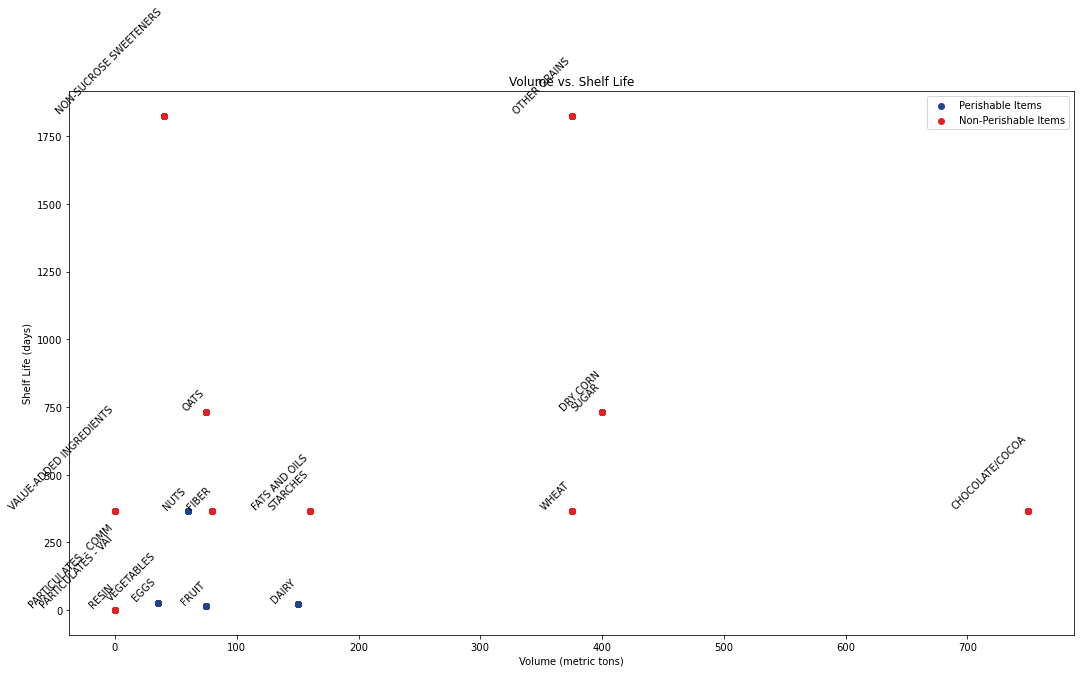

In [15]:
# Define color codes for perishable and non-perishable items
color_mapping = {
    'Perishable': '#234190',  # Blue
    'Non-Perishable': '#E32123'  # Red
}

# Create separate DataFrames for perishable and non-perishable items
perishable_df = data[data['Item Type'] == 'Perishable']
non_perishable_df = data[data['Item Type'] == 'Non-Perishable']

# Create a scatter plot for perishable items
plt.figure(figsize=(18, 10))
plt.scatter(perishable_df['Volume'], perishable_df['Shelf Life'], c=color_mapping['Perishable'], label='Perishable Items')

labeled_items = set()  # Keep track of labeled items

for i, txt in enumerate(perishable_df['Material Description']):
    if txt not in labeled_items:
        plt.annotate(txt, (perishable_df['Volume'].iloc[i], perishable_df['Shelf Life'].iloc[i]), rotation=45, ha='right', va='bottom')
        labeled_items.add(txt)

# Create a scatter plot for non-perishable items
plt.scatter(non_perishable_df['Volume'], non_perishable_df['Shelf Life'], c=color_mapping['Non-Perishable'], label='Non-Perishable Items')

for i, txt in enumerate(non_perishable_df['Material Description']):
    if txt not in labeled_items:
        plt.annotate(txt, (non_perishable_df['Volume'].iloc[i], non_perishable_df['Shelf Life'].iloc[i]), rotation=45, ha='right', va='bottom')
        labeled_items.add(txt)

plt.xlabel('Volume (metric tons)')
plt.ylabel('Shelf Life (days)')
plt.title('Volume vs. Shelf Life')
plt.legend()
plt.show()


<b>Inference:</b> From the assumed values we have non perishable items having lower shelf life and volume.

In [16]:
import statsmodels.api as sm

# Regression analysis for perishable items
model = sm.OLS(data['Safety Days'], sm.add_constant(data[['Volume', 'Shelf Life']])).fit()
print("Regression Summary for Safety days wrt Volume and Shelf Life:")
print(model.summary())

Regression Summary for Safety days wrt Volume and Shelf Life:
                            OLS Regression Results                            
Dep. Variable:            Safety Days   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     45.66
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.68e-20
Time:                        12:34:39   Log-Likelihood:                -41081.
No. Observations:               16171   AIC:                         8.217e+04
Df Residuals:                   16168   BIC:                         8.219e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

<b>Inference:</b> So there is no significant corelation between safety time , shelf life and volume and the regression model also does not explain the data well due to low R square value. Hence real time data is needed for analysis compared to dummy data.

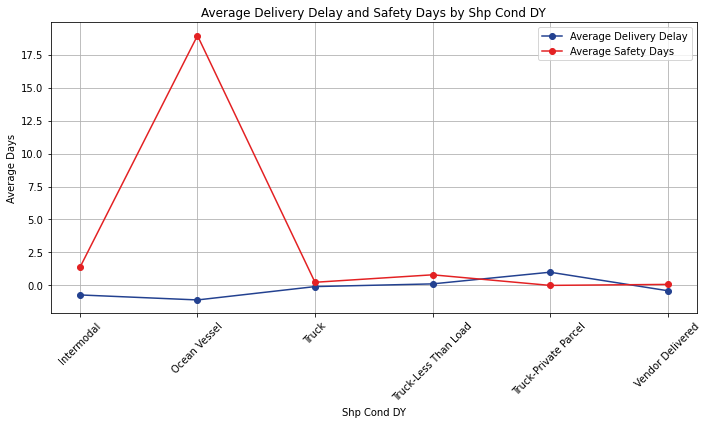

In [17]:
# Group the data by 'Shp Cond Dy' and calculate the averages
averages = data.groupby('Shp Cond DY')[['Delivery Delay', 'Safety Days']].mean()

# Extract x and y data for the line chart
x = averages.index
y_delivery_delay = averages['Delivery Delay']
y_safety_days = averages['Safety Days']

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(x, y_delivery_delay, label='Average Delivery Delay', marker='o', color='#234190')  # Blue line
plt.plot(x, y_safety_days, label='Average Safety Days', marker='o', color='#e32123')  # Red line

# Add labels and legend
plt.xlabel('Shp Cond DY')
plt.ylabel('Average Days')
plt.title('Average Delivery Delay and Safety Days by Shp Cond DY')
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>Inference:</b> There is a significant increase in safety days when Ocean vessels is a mode of transport and for Truck- Private parcel mode ther is an unusual case where Average Delay is greater than Safety days hence these two areas need to be focused in terms of safety time.

# 3. Safety Stock v Safety Time

In this code, we use the Lead Time and Delivery Delay columns as proxies for lead time variability. Safety time is preferred when both the lead time and delivery delay are short (in this case, 7 days or less for lead time and 1 day or less for delivery delay). Otherwise, safety stock is preferred. You can customize the conditions to match your specific business requirements and dataset.

In [33]:
# Safety Time vs Safety Stock
def preferred_safety_method(row):
    if row['Lead Time'] <= 7 and row['Delivery Delay'] >= 1:
        return 'Safety Time Preferred'
    else:
        return 'Safety Stock Preferred'

data['Safety Preference'] = data.apply(preferred_safety_method, axis=1)

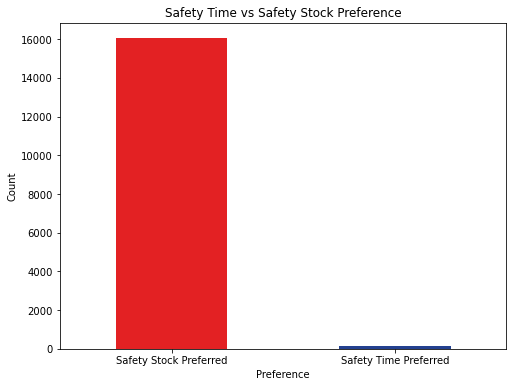

In [34]:
import matplotlib.pyplot as plt

# Count the cases for each preference
preference_counts = data['Safety Preference'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
preference_counts.plot(kind='bar', color=['#e32123', '#234190'])
plt.title('Safety Time vs Safety Stock Preference')
plt.xlabel('Preference')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<b>Inference:</b> Hence safety stock is crucial for most cases

# 4. Effect of Seasonality on Safety times

In this code, we assume that winter months include December, January, and February, and all other months are considered non-winter. We calculate the average safety time for both winter and non-winter months and then decide whether different safety times should be maintained based on whether the averages differ.

In [20]:
# Convert date columns to datetime objects
data['Arrival Dt'] = pd.to_datetime(data['Arrival Dt'])
data['PO Delivery Dt'] = pd.to_datetime(data['PO Delivery Dt'])

# Extract the month from the 'PO Delivery Dt'
data['Delivery Month'] = data['PO Delivery Dt'].dt.month

# Define a function to classify months as winter or non-winter
def classify_season(month):
    if month in [12, 1, 2]:  # Assuming December, January, and February as winter months
        return 'Winter'
    else:
        return 'Non-Winter'

# Apply the season classification function to each row
data['Season'] = data['Delivery Month'].apply(classify_season)

# Calculate the average safety time for winter and non-winter months
average_safety_time_by_season = data.groupby('Season')['Safety Days'].mean()

# Decide whether to maintain different safety times based on seasonality
if average_safety_time_by_season['Winter'] != average_safety_time_by_season['Non-Winter']:
    print("Maintain different safety times based on seasonality.")
    print("Average Safety Time in Winter:", average_safety_time_by_season['Winter'])
    print("Average Safety Time in Non-Winter:", average_safety_time_by_season['Non-Winter'])
else:
    print("No need to maintain different safety times based on seasonality.")


Maintain different safety times based on seasonality.
Average Safety Time in Winter: 0.12788365095285859
Average Safety Time in Non-Winter: 0.39891652302388575


<b>Inference:</b> There is a need to maintain different safety times considering seasonality in ratio 1 : 4 for winter and non winter seaasons respectively 